In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("features/ff_all.csv")

In [81]:
# Adding sqrt values for each column
for col in df.columns:
    # Make sure the column is numeric before applying sqrt
    if pd.api.types.is_numeric_dtype(df[col]):
        df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
        df[f'{col}_squared'] = np.square(df[col])


In [82]:
df.iloc[4:,:]

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_A,...,EA_C_sqrt,EA_C_squared,EN_C_sqrt,EN_C_squared,EN_A_sqrt,EN_A_squared,RadI_A_sqrt,RadI_A_squared,RadI_C_sqrt,RadI_C_squared
4,CsH,400.6,4.51,343,120,6,6,3.849,13.590,0.754,...,0.687023,0.222784,0.888819,0.6241,1.483240,4.8400,13.000000,28561,12.247449,22500
5,CsCl,400.6,14.60,343,175,8,8,3.849,12.960,3.617,...,0.687023,0.222784,0.888819,0.6241,1.777639,9.9856,13.000000,28561,13.453624,32761
6,LiCl,164.1,14.60,120,175,6,6,5.392,12.960,3.617,...,0.786130,0.381924,1.483240,4.8400,1.777639,9.9856,7.745967,3600,13.453624,32761
7,CuI,46.5,32.90,140,198,4,4,7.726,10.451,3.059,...,1.108152,1.507984,1.378405,3.6100,1.630951,7.0756,8.602325,5476,14.696938,46656
8,LiF,164.1,3.74,120,135,6,6,5.392,17.423,3.339,...,0.786130,0.381924,1.483240,4.8400,1.994994,15.8404,7.745967,3600,11.661904,18496


In [83]:
%store -r res
res

[14.137466826376716,
 14.087159279098158,
 14.027021804027779,
 12.930918115689444,
 12.275605094480198,
 3.2325958680570794,
 5.11791434948661,
 3.5739198265668453,
 4.719651538728355]

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
model = ExtraTreesRegressor()
model.fit(df.iloc[5:,1:],res[5:])

ExtraTreesRegressor()

In [86]:
model.feature_importances_

array([9.90621175e-03, 9.49380942e-03, 4.81318228e-02, 2.84551222e-03,
       1.43571258e-03, 2.39285430e-04, 2.03055850e-02, 5.67096216e-03,
       4.47440396e-03, 0.00000000e+00, 1.13944386e-01, 4.78570860e-04,
       9.45886476e-02, 4.06213269e-03, 2.39285430e-04, 5.67096216e-03,
       3.58356183e-03, 2.19395552e-03, 5.73274736e-02, 1.88698724e-02,
       1.86817717e-03, 2.43324095e-03, 5.91024759e-03, 9.90621175e-03,
       9.90621175e-03, 1.19642715e-03, 4.96040121e-03, 9.91350708e-03,
       4.78570860e-04, 6.38881845e-03, 2.99830473e-03, 4.14862561e-03,
       7.17856290e-04, 5.43167673e-03, 1.60655087e-01, 2.83301963e-01,
       4.78570860e-04, 4.78570860e-04, 5.70881882e-02, 1.91091579e-02,
       7.29985390e-03, 1.86817717e-03])

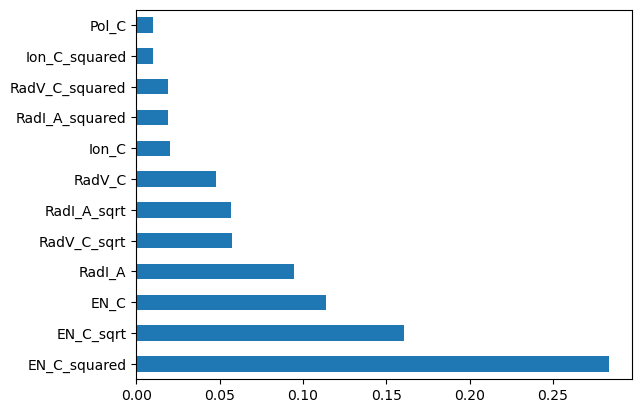

In [87]:
# plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=df.iloc[:,1:].columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()